In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
#load in the OD matrix for POI and bus stops extracted from GIS
fp_dest100 = "OD_allPOI_100.csv"
fp_dest300 = "OD_allPOI_300.csv"
fp_dest500 = "OD_allPOI_500.csv"
fp_dest400 = "OD_allPOI_400.csv"
fp_dest200 = "OD_allPOI_200.csv"
fp_dest600 = "OD_allPOI_600.csv"
fp_trips = "trips.csv"

In [4]:
df_DestBus100 = pd.read_csv(fp_dest100)
df_DestBus300 = pd.read_csv(fp_dest300)
df_DestBus500 = pd.read_csv(fp_dest500)
df_DestBus200 = pd.read_csv(fp_dest200)
df_DestBus400 = pd.read_csv(fp_dest400)
df_DestBus600 = pd.read_csv(fp_dest600)
df_trips = pd.read_csv(fp_trips)

In [5]:
df_DestBus100.dest_busid = df_DestBus100.dest_busid.astype(str)
df_DestBus200.dest_busid = df_DestBus200.dest_busid.astype(str)
df_DestBus300.dest_busid = df_DestBus300.dest_busid.astype(str)
df_DestBus400.dest_busid = df_DestBus400.dest_busid.astype(str)
df_DestBus500.dest_busid = df_DestBus500.dest_busid.astype(str)
df_DestBus600.dest_busid = df_DestBus600.dest_busid.astype(str)
df_trips.dest_busid = df_trips.dest_busid.astype(str)

In [54]:
#caliberating the Beta value
#import random
#random.seed(123)

In [62]:
#Zeros = [0.000212,0.00573,0.00876,0.024,0.00534, 0.0006089,0.0000638, 0.0015, 0.000178, 0.09053, 0.0002,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001,0.0000000001,]

In [55]:
#random.uniform(0, 1)

0.052363598850944326

In [11]:
#make the possible zero values and the beta values
A=[10,50,100,200,500,1000,5000,10000,20000,50000,100000,500000,1000000,10**7,10**8,10**9,10**10,10**11]
zeros = []
beta = []
def calc_beta(zeros):
    beta = round ((np.log(zeros)/-600), 4)
    return beta

for num in A:
    zeros.append(1/num)
    beta.append(calc_beta(1/num))

In [120]:
'''
#calculate access scores using the different beta values for distances of 0 - 600
Dist = [x for x in range(0,700,1)]
df = pd.DataFrame(Dist, columns={'Dist'})
for b in beta:
    df[str(b)] = df['Dist'].map(lambda x: math.exp(-b * x))
df.plot(x='Dist',figsize=(10,8))
'''



In [128]:
df_DestBus600.head()

,Name,Total_Leng,geometry,dest_busid,poi,TRADE_CODE,poi_group
0,6040 - 270005,383.082500,LINESTRING (23189.0745000001 33002.82850000076...,6040,270005.0,9CCARE,child_care
1,5591 - 270005,421.719227,LINESTRING (23253.62270000018 32990.6642000004...,5591,270005.0,9CCARE,child_care
2,1381 - 270005,382.407464,LINESTRING (23187.96160000004 33001.7227999996...,1381,270005.0,9CCARE,child_care
3,1382 - 270005,422.625231,LINESTRING (23254.73560000025 32990.6642000004...,1382,270005.0,9CCARE,child_care
4,1455 - 270005,248.595219,LINESTRING (22861.87440000009 32661.1579999998...,1455,270005.0,9CCARE,child_care


In [6]:
df2= df_DestBus600[['dest_busid','Total_Leng']].copy()


In [7]:
df2.rename(columns={'Total_Leng':'Distance'}, inplace=True)

In [8]:
df2.sort_values(by='Distance',inplace=True)

In [12]:
for b in beta:
    df2[str(b)] = df2['Distance'].map(lambda x: math.exp(-b * x))

Text(0, 0.5, 'access scores')

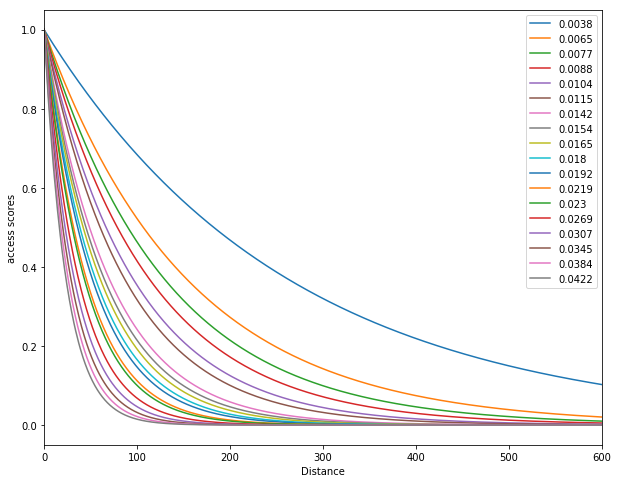

In [13]:
ax = df2.plot(x='Distance',figsize=(10,8))
plt.xlabel("Distance")
plt.ylabel("access scores")

In [54]:
df_sel = df2[['Distance','0.0038', '0.0077', '0.0088', '0.0115', '0.0142',  '0.0422']].copy()

Text(0, 0.5, 'access scores')

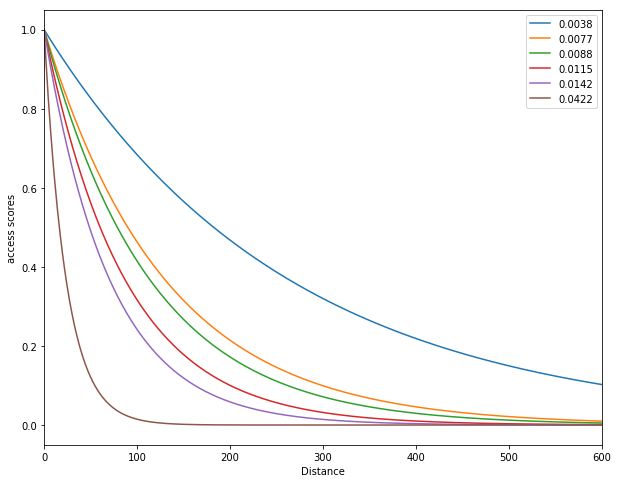

In [56]:
ax = df_sel.plot(x='Distance',figsize=(10,8))
plt.xlabel("Distance")
plt.ylabel("access scores")

In [15]:
#get average length per bus stop
dest_dist = df_DestBus600.groupby('dest_busid')['Total_Leng'].mean().reset_index().rename(columns={'Total_Leng':'avg_distance'})

#1 - group POIs by dest
dest_poi = df_DestBus600.groupby('dest_busid')['poi'].count().reset_index()


In [28]:
#using sum
#df.groupby(['col1', 'col2'])["col3", "col4"].apply(lambda x : x.astype(int).sum())
dest_access = df2.groupby('dest_busid')['0.0038', '0.0065', '0.0077', '0.0088',
       '0.0104', '0.0115', '0.0142', '0.0154', '0.0165', '0.018', '0.0192',
       '0.0219', '0.023', '0.0269', '0.0307', '0.0345', '0.0384', '0.0422'].apply(lambda x:round(x.sum(), 3)).reset_index()

In [29]:
# merge the aggregates which reflects the distinct trips per bus stop
from functools import reduce
#dfs = [dest_trips,orig_trips,dest_poi, dest_dist, dest_access]
dfs = [df_trips,dest_poi, dest_dist, dest_access]
beta_summary = reduce(lambda left,right: pd.merge(left,right,on='dest_busid', how='left'), dfs)

In [24]:
beta_summary.columns

Index(['dest_busid', 'TripsPerDest', 'TripsPerOrig', 'poi', 'avg_distance',
       '0.0038', '0.0065', '0.0077', '0.0088', '0.0104', '0.0115', '0.0142',
       '0.0154', '0.0165', '0.018', '0.0192', '0.0219', '0.023', '0.0269',
       '0.0307', '0.0345', '0.0384', '0.0422'],
      dtype='object')

In [30]:
beta_summary = beta_summary[['dest_busid', 'poi', 'avg_distance',
       '0.0038', '0.0065', '0.0077', '0.0088', '0.0104', '0.0115', '0.0142',
       '0.0154', '0.0165', '0.018', '0.0192', '0.0219', '0.023', '0.0269',
       '0.0307', '0.0345', '0.0384', '0.0422']].copy()

In [32]:
beta_summary.corr()

,poi,avg_distance,0.0038,0.0065,0.0077,0.0088,0.0104,0.0115,0.0142,0.0154,0.0165,0.018,0.0192,0.0219,0.023,0.0269,0.0307,0.0345,0.0384,0.0422
poi,1.000000,0.009457,0.951258,0.855521,0.802994,0.753190,0.682177,0.636201,0.537575,0.500501,0.469983,0.433174,0.407203,0.358511,0.341800,0.294075,0.260225,0.234769,0.214684,0.199108
avg_distance,0.009457,1.000000,-0.208101,-0.334329,-0.371888,-0.395825,-0.414922,-0.419554,-0.411754,-0.403126,-0.393762,-0.379760,-0.368119,-0.342172,-0.331961,-0.298811,-0.271268,-0.247773,-0.227349,-0.210298
0.0038,0.951258,-0.208101,1.000000,0.970267,0.940200,0.906434,0.851341,0.811952,0.718640,0.680589,0.648032,0.607273,0.577513,0.519311,0.498588,0.436990,0.390872,0.354652,0.325006,0.301369
0.0065,0.855521,-0.334329,0.970267,1.000000,0.994439,0.980631,0.949463,0.923001,0.850879,0.818415,0.789401,0.751561,0.722908,0.664356,0.642720,0.575801,0.523021,0.479839,0.443257,0.413299
0.0077,0.802994,-0.371888,0.940200,0.994439,1.000000,0.995761,0.976849,0.957504,0.898439,0.870035,0.843968,0.809155,0.782251,0.725965,0.704761,0.637849,0.583713,0.538548,0.499661,0.467409
0.0088,0.753190,-0.395825,0.906434,0.980631,0.995761,1.000000,0.992309,0.979698,0.933582,0.909444,0.886598,0.855269,0.830523,0.777471,0.757091,0.691500,0.637114,0.590897,0.550499,0.516594
0.0104,0.682177,-0.414922,0.851341,0.949463,0.976849,0.992309,1.000000,0.996940,0.970044,0.952574,0.934932,0.909462,0.888522,0.841687,0.823104,0.761372,0.708210,0.661758,0.620234,0.584768
0.0115,0.636201,-0.419554,0.811952,0.923001,0.957504,0.979698,0.996940,1.000000,0.985917,0.973084,0.959154,0.937986,0.919935,0.878075,0.861026,0.802994,0.751594,0.705777,0.664168,0.628192
0.0142,0.537575,-0.411754,0.718640,0.850879,0.898439,0.933582,0.970044,0.985917,1.000000,0.997869,0.992745,0.982107,0.971360,0.942724,0.929986,0.883252,0.838428,0.796277,0.756411,0.720849
0.0154,0.500501,-0.403126,0.680589,0.818415,0.870035,0.909444,0.952574,0.973084,0.997869,1.000000,0.998465,0.992236,0.984632,0.961912,0.951181,0.909998,0.868764,0.828935,0.790525,0.755759


Text(0, 0.5, 'frequency')

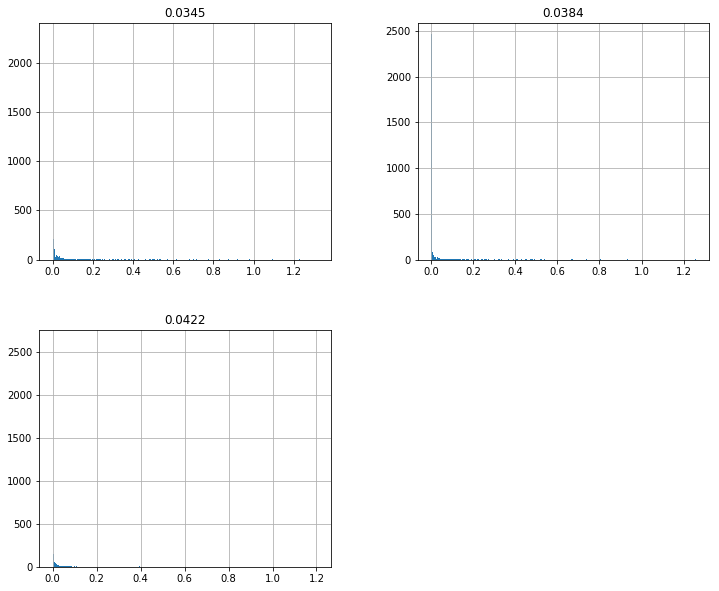

In [52]:
beta_summary[['0.0345', '0.0384', '0.0422']].hist(bins=500, figsize=(12,10))
plt.xlabel("Access Scores per Bus Stop")
plt.ylabel("frequency")

In [ ]:
#beta_summary[['0.0038', '0.0065', '0.0077', '0.0088', '0.0104', '0.0115', '0.0142','0.0154', '0.0165', '0.018', '0.0192', '0.0219', '0.023', '0.0269',
#       '0.0307', '0.0345', '0.0384', '0.0422'].hist(bins=200, figsize=(6,5))